# Exploration
>  Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Biomedical Image Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/tcia-chest-ct-sample.zip
!unzip tcia-chest-ct-sample.zip

## Image data

### Load images

<div class=""><p>In this chapter, we'll work with sections of a <a href="https://en.wikipedia.org/wiki/CT_scan" target="_blank" rel="noopener noreferrer">computed tomography (CT) scan</a> from <a href="http://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/" target="_blank" rel="noopener noreferrer">The Cancer Imaging Archive</a>. CT uses a rotating X-ray tube to create a 3D image of the target area.</p>
<p>The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields. </p>
<p>To warm up, use the <code>imageio</code> package to load a single DICOM image from the scan volume and check out a few of its attributes.</p></div>

Instructions
<ul>
<li>Import <code>imageio</code>.</li>
<li>Read in the image "chest-220.dcm" using the <code>imread()</code> function.</li>
<li>Print the <code>type()</code> and <code>shape</code> (number of pixels) of <code>im</code>.</li>
</ul>

In [6]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread("chest-220.dcm")

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


**imageio is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.**

### Metadata

<div class=""><p>ImageIO reads in data as <code>Image</code> objects. These are standard NumPy arrays with a dictionary of metadata. </p>
<p>Metadata can be quite rich in medical images and can include:</p>
<ul>
<li><strong>Patient demographics</strong>: name, age, sex, clinical information</li>
<li><strong>Acquisition information</strong>: image shape, sampling rates, data type, <a href="https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities" target="_blank" rel="noopener noreferrer">modality</a> (such as X-Ray, CT or MRI)</li>
</ul>
<p>Start this exercise by reading in the chest image and listing the available fields in the <code>meta</code> dictionary. </p>
<hr>
<p>After reading in the image, use <code>im.meta</code> to select the <strong>true</strong> statement from the list below.</p></div>

Instructions 1/2
<ul>
<li>Read in the image, "chest-220.dcm".</li>
<li>Print the available keys in the metadata dictionary. Use the the <code>keys()</code> method of <code>im.meta</code>.</li>
</ul>

In [7]:
# Import ImageIO and load image
import imageio
im = imageio.imread("chest-220.dcm")

# Print the available metadata fields
print(*im.meta.keys(), sep='\n')

TransferSyntaxUID
SOPClassUID
SOPInstanceUID
StudyDate
SeriesDate
ContentDate
StudyTime
SeriesTime
ContentTime
Modality
Manufacturer
StudyDescription
SeriesDescription
PatientName
PatientID
PatientBirthDate
PatientSex
PatientWeight
StudyInstanceUID
SeriesInstanceUID
SeriesNumber
AcquisitionNumber
InstanceNumber
ImagePositionPatient
ImageOrientationPatient
SamplesPerPixel
Rows
Columns
PixelSpacing
BitsAllocated
BitsStored
HighBit
PixelRepresentation
RescaleIntercept
RescaleSlope
PixelData
shape
sampling


Instructions 2/2

In [ ]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'),
      ('StudyDate', '20040529'),
      ('SeriesDate', '20040515'),
      ('ContentDate', '20040515'),
      ('StudyTime', '115208'),
      ('SeriesTime', '115254'),
      ('ContentTime', '115325'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', 'PET CT with registered MR'),
      ('SeriesDescription', 'CT IMAGES - RESEARCH'),
      ('PatientName', 'STS_007'),
      ('PatientID', 'STS_007'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientWeight', 82.0),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'),
      ('SeriesNumber', 2),
      ('AcquisitionNumber'

<pre>
Possible Answers
'Modality' is 'MR'
'sampling' is '(0.47, 0.47)'=
<b>'PatientSex' is 'F'</b>
'StudyDate' is '20120819
</pre>

**DICOM files have rich information related to patient and acquisition information, but other image formats can have helpful information as well.**

### Plot images

<div class=""><p>Perhaps the most critical principle of image analysis is: <strong>look at your images</strong>!</p>
<p>Matplotlib's <code>imshow()</code> function gives you a simple way to do this. Knowing a few simple arguments will help:</p>
<ul>
<li><code>cmap</code> controls the color mappings for each value. The "gray" colormap is common, but <a href="https://matplotlib.org/users/colormaps.html" target="_blank" rel="noopener noreferrer">many others are available</a>.</li>
<li><code>vmin</code> and <code>vmax</code> control the color contrast between values. Changing these can reduce the influence of extreme values.</li>
<li><code>plt.axis('off')</code> removes axis and tick labels from the image.</li>
</ul>
<p>For this exercise, plot the CT scan and investigate the effect of a few different parameters.</p></div>

Instructions 1/4
<li>Set the stage by importing packages and loading the CT scan. <code>matplotlib.pyplot</code> is often loaded as <code>plt</code>.</li>

In [8]:
# Import ImageIO and PyPlot 
import imageio
import matplotlib.pyplot as plt

# Read in "chest-220.dcm"
im = imageio.imread("chest-220.dcm")

Instructions 2/4
<li>Draw the image in grayscale. Also, set <code>vmin=-200</code> and <code>vmax=200</code> to increase the contrast (i.e., the distance between the brightest and darkest colors is smaller than before).</li>

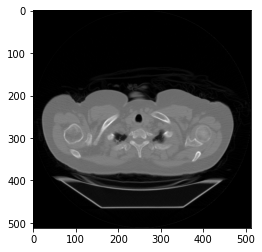

In [ ]:
# Draw the image in grayscale
plt.imshow(im, cmap="gray")

# Render the image
plt.show()

Instructions 3/4
<li>Draw the image in grayscale. Also, set <code>vmin=-200</code> and <code>vmax=200</code> to increase the contrast (i.e., the distance between the brightest and darkest colors is smaller than before).</li>

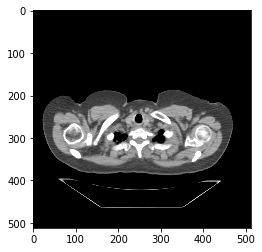

In [ ]:
# Draw the image with greater contrast
plt.imshow(im, cmap="gray", vmin=-200, vmax=200)

# Render the image
plt.show()

Instructions 4/4
<li>Turn axis ticks and labels off.</li>

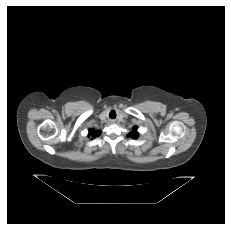

In [ ]:
# Draw the image with greater contrast
plt.imshow(im, cmap="gray", vmin=-200, vmax=200)

# Remove axis ticks and labels
plt.axis('off')

# Render the image
plt.show()

**Manipulating cmap, vmin, and vmax will give you the flexibility to plot all types of data. Remember, though, that they only affect the plot and not the underlying data.**

### N-dimensional images

### Stack images

<div class=""><p>Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.</p>
<p>
  <img src="https://assets.datacamp.com/production/repositories/2085/datasets/b540e2aca266bd28b0465a97f5c424efb285cd8d/Ch1_L2_Stacks4D.PNG" width="45%">
</p>
<p>In this exercise, we will use NumPy's <code>stack()</code> function to combine several 2D arrays into a 3D volume. <a href="http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-images-coordinate-conventions" target="_blank" rel="noopener noreferrer">By convention</a>, volumetric data should be stacked along the first dimension: <code>vol[plane, row, col]</code>.</p>
<p><em>Note: performing any operations on an ImageIO <code>Image</code> object will convert it to a <code>numpy.ndarray</code>, stripping its metadata.</em></p></div>

Instructions
<ul>
<li>Import <code>imageio</code> and <code>numpy</code> (as <code>np</code>).</li>
<li>Load "chest-220.dcm", "chest-221.dcm", and "chest-222.dcm".</li>
<li>Create a 3D volume using <code>np.stack()</code>. Set the stacking <code>axis</code> to 0.</li>
<li>Print the <code>shape</code> attribute of <code>vol</code>.</li>
</ul>

In [15]:
# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image
im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
im3 = imageio.imread('chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3])
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


**For large volumes, you can use a for loop to quickly generate your image list.**

### Load volumes

<div class=""><p>ImageIO's <code>volread()</code> function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.</p>
<p>For this exercise, read in an entire volume of brain data from the <code>"tcia-chest-ct"</code> folder, which contains 25 DICOM images.</p></div>

Instructions
<ul>
<li>Use <code>volread()</code> to load the directory, "tcia-chest-ct".</li>
<li>Print the available metadata using the <code>keys()</code> method of <code>vol.meta</code>.</li>
<li>Print the <code>shape</code> of the volume.</li>
</ul>

In [1]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/tcia-chest-ct.zip
!unzip tcia-chest-ct.zip -d tcia-chest-ct

In [19]:
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/25 files (4.0%)25/25 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 25/25  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (25, 512, 512)


**Using volread() to load image volumes can be faster and more reliable than loading them in image-by-image. It also preserves image metadata where possible.**

### Field of view

<div class=""><p>The amount of physical space covered by an image is its <strong>field of view</strong>, which is calculated from two properties:</p>
<ul>
<li><strong>Array shape</strong>, the number of data elements on each axis. Can be accessed with the <code>shape</code> attribute.</li>
<li><strong>Sampling resolution</strong>, the amount of physical space covered by each pixel. <em>Sometimes</em> available in metadata (e.g., <code>meta['sampling']</code>).</li>
</ul>
<p>For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of <code>vol</code>. All values are in millimeters.</p></div>

In [ ]:
np.array(vol.shape)*np.array(vol.meta['sampling'])

array([ 81.75    , 499.999744, 499.999744])

<pre>
Possible Answers
(25, 512, 512)
(50, 1024, 1024)
<b>(82, 500, 500)</b>
(3.27, 0.97, 0.97)
</pre>

**You should always investigate your image's metadata to get a complete understanding of its origins.**

## Advanced plotting

### Generate subplots

<div class=""><p>You can draw multiple images in one figure to explore data quickly. Use <code>plt.subplots()</code> to generate an array of subplots.</p>
<pre><code>fig, axes = plt.subplots(nrows=2, ncols=2)
</code></pre>
<p>
  <img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_7033/datasets/Ch1_L3_Fig.png" width="300">
</p>
<p>To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: <code>axes[0,0].imshow(im)</code> rather than <code>plt.imshow(im)</code>.</p>
<p>For this exercise, draw <code>im1</code> and <code>im2</code> on separate subplots within the same figure.</p></div>

Instructions
<ul>
<li>Create a subplots grid where <code>nrows=2</code> and <code>ncols=1</code>.</li>
<li>Draw <code>im1</code> and <code>im2</code> on the first and second subplots respectively. Use a "gray" colormap for each.</li>
<li>For each subplot, turn off the axis ticks and labels.</li>
<li>Render the figure.</li>
</ul>

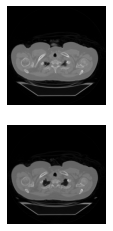

In [16]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')

# Remove ticks/labels and render
axes[0].axis("off")
axes[1].axis("off")
plt.show()

**For even more rapid visualization, you can use a large number of subplots and loop through your axes and images.**

### Slice 3D images

<div class=""><p>The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.</p>
<p>
  <img src="https://assets.datacamp.com/production/repositories/2085/datasets/755e2178082059cd0735af51ca56193ac98eb181/Ch1_L3_Axial16x9.gif" width="45%">
</p>
<p>To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: <code>vol[0, :, :]</code></p>
<p>For this exercise, use <code>for</code> loop to plot every 40th slice of <code>vol</code> on a separate subplot. <code>matplotlib.pyplot</code> (as <code>plt</code>) has been imported for you.</p></div>

Instructions
<ul>
<li>Using <code>plt.subplots()</code>, initialize a subplots grid with 1 row and 4 columns.</li>
<li>Plot every 40th slice of <code>vol</code> in grayscale. To get the appropriate index, multiply <code>ii</code> by <code>40</code>.</li>
<li>Turn off the ticks, labels, and frame for each subplot.</li>
<li>Render the figure.</li>
</ul>

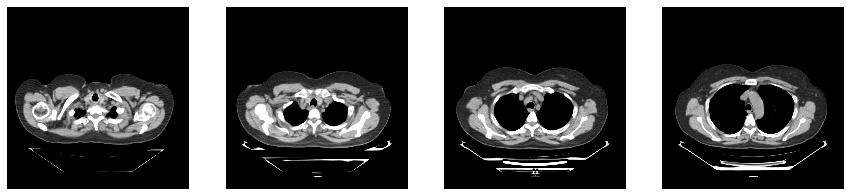

In [35]:
# Plot the images on a subplots array 
#fig, axes = plt.subplots(nrows=1, ncols=4)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))

# Loop through subplots and draw image
for ii in range(4):
    #im = vol[ii*6] #40
    im = vol[ii*6,:,:]
    #axes[ii].imshow(im, cmap='gray')
    axes[ii].imshow(im, cmap='gray', vmin=-150, vmax=150)
    axes[ii].axis("off")
    
# Render the figure
plt.show()

**When selecting frames, any trailing : symbols are implicitly selected. For example, vol[5] is the same as vol[5,:,:]. We will follow this simpler convention moving forward.**

### Plot other views

<div class=""><p>Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images. </p>
<p>
  <img src="https://assets.datacamp.com/production/repositories/2085/datasets/d47a99b81299b9c8521f0a15a27a375688a9c6fd/Ch1_L3_Shape-Sampling.PNG" width="40%">
</p>
<p>Changing the <em>aspect</em> ratio can address this by increasing the width of one of the dimensions.</p>
<p>For this exercise, plot images that slice along the second and third dimensions of <code>vol</code>. Explicitly set the aspect ratio to generate undistorted images.</p></div>

Instructions
<ul>
<li>Slice a 2D plane from <code>vol</code> where "axis 1" is <code>256</code>.</li>
<li>Slice a 2D plane from <code>vol</code> where "axis 2" is <code>256</code>.</li>
<li>For each image, calculate the aspect ratio by dividing the image "sampling" rate for axis 0 by its opponent axis. This information is in <code>vol.meta</code>.</li>
<li>Plot the images in a subplots array. Specify the <code>aspect</code> ratio for each image, and set <code>cmap='gray'</code>.</li>
</ul>

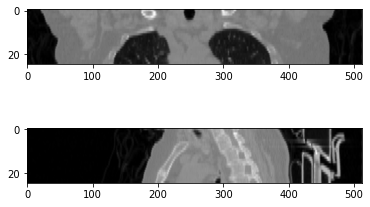

In [56]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :,256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()